In [1]:
from numqt import *

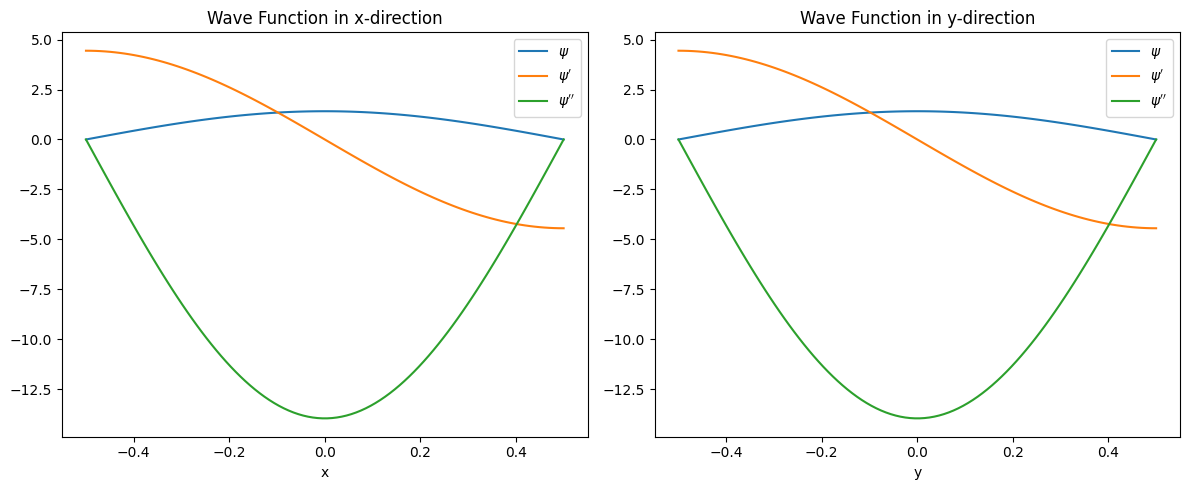

In [2]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Characteristic length along x
Ly = 1 # Characteristic length along y

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
xbounds = (-Lx/2, Lx/2) # confinement length
ybounds = (-Ly/2, Ly/2) # confinement length


dx = 0.01 # spacing
dy = 0.01 # spacing

nx = int(np.abs(xbounds[1] - xbounds[0]) / dx)
ny = int(np.abs(ybounds[1] - ybounds[0]) / dy)

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=2,
                xbounds=xbounds,
                ybounds=ybounds,
                nx=nx, 
                ny=ny)

dimx = mesh_obj.Nx
dimy = mesh_obj.Ny
#-----------------------------------------------------------
# Guess basis
#-----------------------------------------------------------
# Number of states and the state function definitions.
N_states = 30

psix_fn = lambda n, mesh: iw_state(n, mesh, center=0, L=Lx)  
psiy_fn = lambda n, mesh: iw_state(n, mesh, center=0, L=Ly) 
basis = {"x": (psix_fn, N_states),
         "y": (psiy_fn, N_states),}
# Choose the state to visualize (e.g., the ground state: n=0).
state = 0

# Create a figure with two subplots side by side.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# For the x-direction: plot psi, psi', and psi'' for psix_fn.
labels = [r"$\psi$", r"$\psi'$", r"$\psi''$"]
psi_x = psix_fn(state, mesh_obj.mesh_x)
psi_y = psiy_fn(state, mesh_obj.mesh_y)
for i in range(3):
    ax1.plot(mesh_obj.mesh_x, psi_x[i], label=labels[i])
    ax2.plot(mesh_obj.mesh_y, psi_y[i], label=labels[i])
    
ax1.set_xlabel("x")
ax2.set_xlabel("y")
ax1.set_title("Wave Function in x-direction")
ax2.set_title("Wave Function in y-direction")
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()


In [3]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, basis = basis, ops_to_compute = ["p2"], additional_subspaces = None, hbar=1)
px2 = operators.get_ops()["p2"][0]
py2 = operators.get_ops()["p2"][1]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian((px2 + py2) / (2*m), mesh_obj, basis = basis)

In [4]:
k = N_states**2 - 2 
energies, wavefunctions = H.solve(k)

Solved eigenvalue problem.


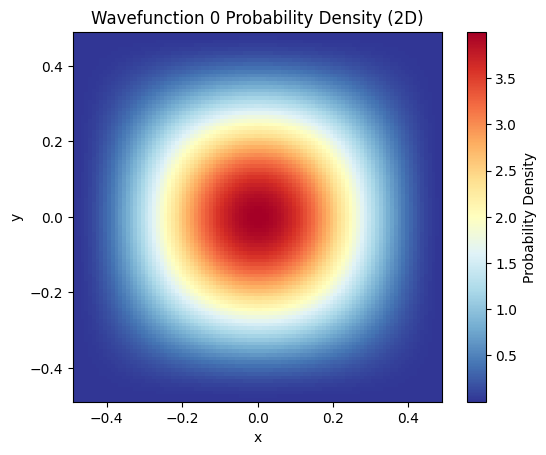

In [5]:
H.plot(0)

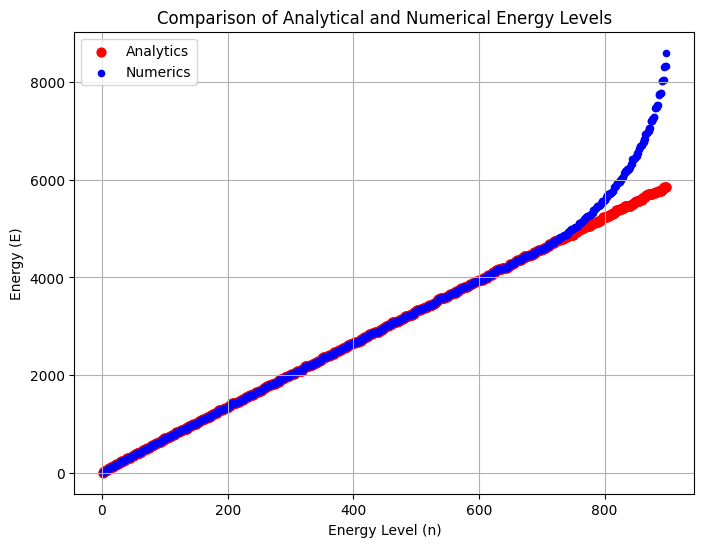

In [6]:
# Define the analytical energy function
def energy(nx, ny):
    return nx**2 * np.pi**2 * hbar**2  / (2 * m * Lx**2) + ny**2 * np.pi**2 * hbar**2  / (2 * m * Ly**2)

# Generate analytical energy levels
analytical_energies = sorted([energy(nx, ny) for nx in range(1, k+1) for ny in range(1, k+1)])[:k]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(1, k+1), analytical_energies, c="r", s=40, label="Analytics")
plt.scatter(range(1, k+1), energies, c="b", s=20, label="Numerics")
plt.legend()
plt.ylabel("Energy (E)")
plt.xlabel("Energy Level (n)")
plt.title("Comparison of Analytical and Numerical Energy Levels")
plt.grid(True)

plt.show()